In [0]:
# Import necessary libraries
import keras
from keras.datasets import mnist
from keras import backend as k
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import adam

Using TensorFlow backend.


In [0]:
# Defined model parameters
batch_size = 128
num_classes = 10
epoch = 10
n_row, n_col = 28, 28
# Load mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
# For "tensorflow "or "cntk" backends, it should be "channels_last".
# For "theano", it should be "channels_first". 
# Both TensorFlow and Theano expects a four dimensional tensor as input.
# tensorflow expects tensor with shape(samples, rows, cols, channels)
# theano expects tensor with shape(samples, channels, rows, cols).
# We can also set this in each conv layer using data_format = "channels_first" or "channels_last"
if k.image_data_format() == "channels_first":
    x_train = x_train.reshape(x_train.shape[0], 1, n_row, n_col)
    x_test = x_test.reshape(x_test.shape[0], 1, n_row, n_col)
    input_shape = (1, n_row, n_col)
else:
    x_train = x_train.reshape(x_train.shape[0], n_row, n_col, 1)
    x_test = x_test.reshape(x_test.shape[0], n_row, n_col, 1)
    input_shape = (n_row, n_col, 1)

In [0]:
# Normalization
x_train = x_train/255
x_test = x_test/255
print("X train shape", x_train.shape)
print("X test shape", x_test.shape)

X train shape (60000, 28, 28, 1)
X test shape (10000, 28, 28, 1)


In [0]:
# Convert each class label into 10-D vector So,that whereever we have class belongs to certain image it will be 1 otherwise 0.
# Basically doing one hot encoding 
print("Before conversion", y_train[0])
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print("After conversion", y_train[0])

Before conversion 5
After conversion [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss") 
    plt.legend()
    plt.grid()
    fig.canvas.draw()

# 1.  3 Convolutional layer+ relu + adam with kernel size = (5*5)

In [0]:
# model 
model = Sequential()
model.add(Conv2D(32, kernel_size = (5, 5), activation = "relu", input_shape = input_shape))
model.add(Dropout(0.5))

model.add(Conv2D(64, kernel_size = (5, 5), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size = (5, 5), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))
          
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = "softmax"))

model.compile(loss = categorical_crossentropy, metrics = ["accuracy"], optimizer = "Adam")
history = model.fit(x_train, y_train, batch_size, epochs = epoch, verbose = 1, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 344s 6ms/step - loss: 0.3538 - acc: 0.8843 - val_loss: 0.0534 - val_acc: 0.9829
Epoch 2/10
60000/60000 [==============================] - 340s 6ms/step - loss: 0.1055 - acc: 0.9679 - val_loss: 0.0372 - val_acc: 0.9882
Epoch 3/10
60000/60000 [==============================] - 338s 6ms/step - loss: 0.0831 - acc: 0.9752 - val_loss: 0.0294 - val_acc: 0.9909
Epoch 4/10
60000/60000 [==============================] - 341s 6ms/step - loss: 0.0684 - acc: 0.9797 - val_loss: 0.0240 - val_acc: 0.9917
Epoch 5/10
60000/60000 [==============================] - 342s 6ms/step - loss: 0.0605 - acc: 0.9819 - val_loss: 0.0238 - val_acc: 0.9926
Epoch 6/10
60000/60000 [==============================] - 341s 6ms/step - loss: 0.0545 - acc: 0.9833 - val_loss: 0.0216 - val_acc: 0.9931
Epoch 7/10
60000/60000 [==============================] - 337s 6ms/step - loss: 0.0531 - acc: 0.9844 - val_loss: 0.0232 - 

Test score: 0.020037536787898717
Test accuracy: 0.9944


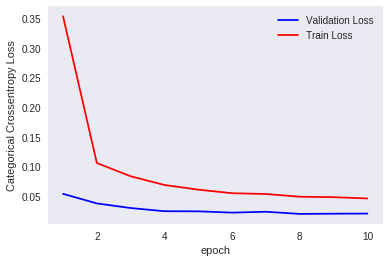

In [0]:
score351 = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score351[0]) 
print('Test accuracy:', score351[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1, epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 5 Convolutional layer 

In [0]:
# model 
model = Sequential()
model.add(Conv2D(30, kernel_size = (5, 5), activation = "relu", input_shape = input_shape))
model.add(Conv2D(70, kernel_size = (5, 5), activation = "relu"))
model.add(Dropout(0.5))

model.add(Conv2D(110, kernel_size = (5, 5), activation = "relu"))
model.add(Conv2D(150, kernel_size = (5, 5), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(190, kernel_size = (5, 5), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(245, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = "softmax"))
model.compile(loss = categorical_crossentropy, metrics = ["accuracy"], optimizer = "Adam")
history = model.fit(x_train, y_train, batch_size, epochs = epoch, verbose = 1, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1451s 24ms/step - loss: 0.3697 - acc: 0.8768 - val_loss: 0.0571 - val_acc: 0.9812
Epoch 2/10
60000/60000 [==============================] - 1449s 24ms/step - loss: 0.0670 - acc: 0.9810 - val_loss: 0.0405 - val_acc: 0.9870
Epoch 3/10
60000/60000 [==============================] - 1434s 24ms/step - loss: 0.0492 - acc: 0.9862 - val_loss: 0.0294 - val_acc: 0.9905
Epoch 4/10
60000/60000 [==============================] - 1428s 24ms/step - loss: 0.0401 - acc: 0.9885 - val_loss: 0.0259 - val_acc: 0.9919
Epoch 5/10
60000/60000 [==============================] - 1427s 24ms/step - loss: 0.0362 - acc: 0.9897 - val_loss: 0.0298 - val_acc: 0.9904
Epoch 6/10
60000/60000 [==============================] - 1443s 24ms/step - loss: 0.0327 - acc: 0.9908 - val_loss: 0.0284 - val_acc: 0.9909
Epoch 7/10
60000/60000 [==============================] - 1440s 24ms/step - loss: 0.0276 - acc: 0.9922 - val_l

Test score: 0.03385695243014325
Test accuracy: 0.9916


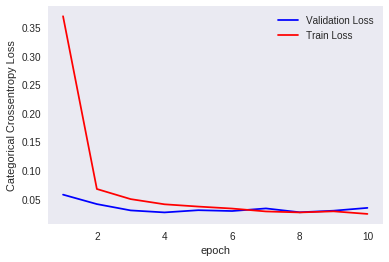

In [17]:
score551 = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score551[0]) 
print('Test accuracy:', score551[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1, epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**Conclusions**<br>
1. We used 2 different architecture with 5 * 5 kernel size and obtained good accuracy but if we would run for more epoch accuracy may increase.
2. Tried many more architecture with different kernel sizes, maxpooling, bn, dropout and colab takes lot of time to run and in between it gets disconnects and then need to run from start that is irritating, that is why not included that architecture.

In [19]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["MODEL", "ACCURACY"]
x.add_row(["CNN with 3 layers, kernel size = (5*5)", score351[1]])
x.add_row(["CNN with 5 layers, kernel_size = (5*5)", score551[1]])
print(x)

+----------------------------------------+----------+
|                 MODEL                  | ACCURACY |
+----------------------------------------+----------+
| CNN with 3 layers, kernel size = (5*5) |  0.9944  |
| CNN with 5 layers, kernel_size = (5*5) |  0.9916  |
+----------------------------------------+----------+
